# Potencialno najbolj popularne knjige leta 2019 na Goodreads 
## Analiza podatkov knjig
V datoteki ```knjige.csv``` je zbranih 1132 vnosov seznama [Goodreads Choice Awards 2019 (eligible for write-in only)](https://www.goodreads.com/list/show/133723.Goodreads_Choice_Awards_2019_eligible_for_write_in_only_) s spletne strani Goodreads, ki je namenjena uporabnikom knjig. V datoteki s hipotezami je omenjenih 970 vnosov, vendar se je seznam v času do zajema podatkov povečal.
Za vsak vnos sem zajela naslov knjige, njenega avtorja, število ocen (oziroma število uporabnikov spletne strani, ki je knjigi dalo oceno, ne glede na pripadnost seznamu) ter povprečno oceno. Nisem zajela ocene 'score' in števila glasov na seznamu, saj sta neustrezna glede na knjigo kot objekt te spletne strani, kot tudi za glasovanje za Goodreads choice awards.

In [1]:
import pandas as pd

knjige = pd.read_csv('knjige.csv', index_col='naslov')

## Najbolj brani naslovi
Seznam knjig uredimo padajoče glede na število ocen. Sklepamo, da knjige, ki imajo večje število bralcev, dobijo tudi več ocen. Iz dobljenega seznama je razviden odgovor na tretje vprašanje med delovnimi hipotezami: najbolj brana naslova leta 2019 sta s skoraj 0,5 milijona bralci Educated in Where the Crawdads Sing.

In [59]:
knjige.sort_values('stevilo_ocen', ascending=False)

,avtor,povprecna_ocena,stevilo_ocen
naslov,,,
Educated,Tara Westover,4.48,493458
Where the Crawdads Sing,Delia Owens,4.50,491932
Then She Was Gone,Lisa Jewell,4.04,127699
One Day in December,Josie Silver,3.99,102928
"The Proposal (The Wedding Date, #2)",Jasmine Guillory,3.43,41043
...,...,...,...
The Box Top to Life's Puzzle,Marcus Hurst,5.00,1
Mya: His Majesty's Elite,Missy Sheldrake,5.00,1
Papaya,Tanasia Davis-Ramsey,5.00,1


## Najbolje ocenjeni avtorji
Preden se lotimo druge hipoteze, se omejimo na vnose, ki so ocenjeni s strani vsaj 100 uporabnikov, saj mnenje posameznika ali dveh ne implicira splošnega zadovoljstva bralcev.
Oglejmo si še dejavnost pisateljev v številu izdanih del, ki so na tem seznamu, da lahko dobimo predstavo o morebitni hiperprodukciji posameznikov.

In [2]:
avtorji = knjige[knjige.stevilo_ocen > 100].groupby('avtor')

In [3]:
avtorji.count().sort_values('stevilo_ocen', ascending=False)

,povprecna_ocena,stevilo_ocen
avtor,,
Caroline Peckham,14,14
J.T. Geissinger,6,6
Ginger Baum,4,4
Nicole Fox,4,4
Heather Gudenkauf,4,4
...,...,...
Hank Phillippi Ryan,1,1
Hannah Paasch,1,1
Harriet Tyce,1,1


Sedaj lahko seznam razporedimo glede na padajočo povprečno oceno. Vidimo, da so vse 4 knjige Ginger Baum na samem vrhu, kar lahko pomeni, da ima avtorica zvesto, a relativno majhno bazo privržencev. Ker je vprašanje, kateri avtor je najbolje ocenjen in ne najbolj priljubljen, se bomo zadovoljili z odgovorom Ginger Baum.

In [62]:
knjige[knjige.stevilo_ocen > 100].sort_values('povprecna_ocena', ascending=False)

,avtor,povprecna_ocena,stevilo_ocen
naslov,,,
The Devil's Deceptions: Is There Life After Death?,Ginger Baum,4.98,174
100 Fun Bible Facts: The Exciting way to Learn (100 Bible Facts Book 1),Ginger Baum,4.97,269
100 Bible Facts About Jesus: The Exciting way to Learn,Ginger Baum,4.96,260
Jubal's Field Trip To Heaven: Jubal and Chanan Enter Through the Narrow Gate (Jubal's Divine Adventures #1),Ginger Baum,4.96,183
"Fuck Yeah, Video Games: The Life and Extra Lives of a Professional Nerd",Daniel Hardcastle,4.75,181
...,...,...,...
The Plus One,Sarah Archer,3.03,531
The DNA of You and Me,Andrea Rothman,2.94,737
Quantum (Captain Chase #1),Patricia Cornwell,2.93,8893


Spodaj so zbrane še knjige, ki so ocenjene s 5.0 in pripadajoče število ocen potrdi domnevo, da je izjemno dobra ocena posledica majhnega občinstva (to pa je lahko tudi posledica nedavne izdaje) in nas napelje na zadnjo (prvo) hipotezo: ali so bolj brane knjige slabše ocenjene?

In [63]:
knjige[knjige.povprecna_ocena == 5.0]

,avtor,povprecna_ocena,stevilo_ocen
naslov,,,
"Jade Horizons (Anthology of Resuoh, #3)",R.E. Houser,5.0,9
"Remnants of Tomorrow (Anthology of Resuoh, #2)",R.E. Houser,5.0,7
"Endometriosis: it's not in your head, it's in your pelvis",Bethany Stahl,5.0,4
Walking Between Worlds: A Spiritual Odyssey,Athena Demetrios,5.0,3
Life Has A Way,Dwayne Jenkins,5.0,3
Bailey Brings Her Friends Together with Music,Kali Bate,5.0,1
The Box Top to Life's Puzzle,Marcus Hurst,5.0,1
Mya: His Majesty's Elite,Missy Sheldrake,5.0,1
"Salt & Steel (Akio's Tale, #1)",NAK Baldron,5.0,10


## Povezava med številom ocen in oceno
To vprašanje bomo raziskali s pomočjo grafov.
Postavila sem hipotezo, da so knjige, ki imajo večje občinstvo v splošnem manj prizanesljivo ocenjene oziroma imajo več kritičnih bralcev. \
Primerjajmo najprej preprosto korelacijo med številom ocen in povprečno oceno.

In [72]:
%matplotlib inline

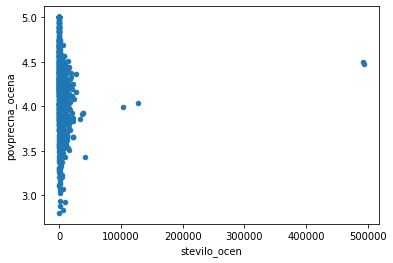

In [78]:
knjige[knjige.povprecna_ocena > 0].plot.scatter('stevilo_ocen', 'povprecna_ocena')

Ker iz zgornjega grafa lahko razberemo le malo (zaradi velikih razhajanj med posameznimi knjigami in veliko večino ostalih), se bomo poslužili logaritemske skale na x osi. 

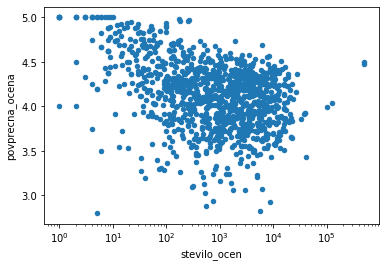

In [87]:
knjige[knjige.povprecna_ocena > 0].plot.scatter('stevilo_ocen', 'povprecna_ocena').set_xscale('log')

Kot vidimo, je slednji graf v obliki oblaka, ki se rahlo nagiba desno navzdol. Takšna oblika namiguje prav na potrditev hipoteze o nižjih ocenah pri večji branosti, vendar pa je za oceno točnosti tega sklepa potrebno boljše poznavanje ustreznosti (uporabljenih) metod v statistiki.